In [1]:
import functions.uap as uap
import pandas as pd
import pickle as pk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
RSEED = 42
df = uap.get_data()

In [ ]:
base_model_df = df[['target', 'Place_ID', 'day_of_year']]
base_model_enc = uap.convert_to_categorical(base_model_df, 'Place_ID')
print(base_model_enc.columns)
X = base_model_enc.drop(['target'], axis=1)
y_con = base_model_enc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y_con, test_size=0.2, random_state=RSEED, stratify=)

Index(['target', 'day_of_year', '05EC30X', '0DPWHX8', '0GBXTHY', '0HYPV1N',
       '0I2XREH', '0KV6RJ1', '0MGEY68', '0O9R6AD',
       ...
       'YAQHNNY', 'YAXBMZ6', 'YCXA4V5', 'YDW4K0H', 'YJENTFL', 'YLLOKEY',
       'YLZOBFW', 'YPXSK14', 'YSIXKFZ', 'YWSFY6Q'],
      dtype='object', length=341)


In [4]:
reg_base_model = LinearRegression()
reg_base_model.fit(X_train, y_train)
uap.check_regression(reg_base_model, X_train, X_test, y_train, y_test)


|Score|Test|Train|
|:--|--:|--:|
|MAE|19.56|19.05|
|MSE|849.52|787.23|
|R² Score|0.61|0.64|


In [5]:
cat_base_model_df = df[['target_aqi', 'Place_ID', 'day_of_year']]
cat_base_model_enc = uap.convert_to_categorical(cat_base_model_df, 'Place_ID')
X = cat_base_model_enc.drop(['target_aqi'], axis=1)
y_con = cat_base_model_enc['target_aqi']
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_con, test_size=0.2, random_state=RSEED)

/home/boesi/lessons/2025-05-06-ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


24141    1
26865    2
22772    1
25624    0
21690    1
        ..
12927    1
22813    1
20033    1
5550     1
27785    2
Name: target_aqi, Length: 6112, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]


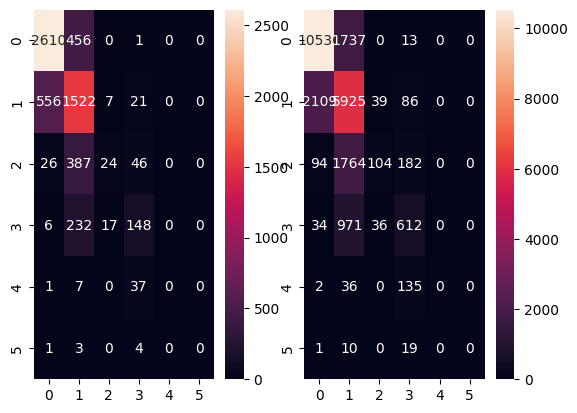

In [6]:
cat_base_model = LogisticRegression()
cat_base_model.fit(X_train, y_train_cat)
print(y_test_cat)
uap.check_classification(cat_base_model, X_train_cat, X_test_cat, y_train_cat, y_test_cat)



In [7]:
with open('models/base_linreg_model.pkl', 'wb') as f:
    pk.dump(reg_base_model, f)

In [8]:
y_pred_cat = cat_base_model_df.predict(X_test)

y_prob = cat_base_model_df.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print("Precision:", precision_score(y_test, y_pred_cat))
print("Recall:", recall_score(y_test, y_pred_cat))
print("F1 Score:", f1_score(y_test, y_pred_cat))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

AttributeError: 'DataFrame' object has no attribute 'predict'

In [ ]:
with open('models/base_logreg_model.pkl', 'wb') as f:
    pk.dump(reg_base_model, f)